# Haberman's Survival dataset analysis - EDA

Data Description : The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status : 1 = the patient survived 5 years or longer, 2 = the patient died within 5 years

Objective - To predict whether patient will survive after 5 years based upon Patient age, year of treatment and number of axillary nodes

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cancer = pd.read_csv('haberman.csv', header=None, 
                     names=['Patient_Age', 'Treatment_Year',
                            'Axillary_nodes', 'Survival_Status'])
cancer.head()

,Patient_Age,Treatment_Year,Axillary_nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [121]:
# How many data points and features?
print(cancer.shape)

(306, 4)


In [122]:
# Column names in dataset
print(cancer.columns)

Index(['Patient_Age', 'Treatment_Year', 'Axillary_nodes', 'Survival_Status'], dtype='object')


In [123]:
# How many data points present for each class

cancer["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

# Observation :
* cancer is an imbalanced dataset as there is big difference between the number of data points for both classes

In [124]:
# modify the output column values to be meaningful
cancer["Survival_Status"] = cancer["Survival_Status"].map({1:"Yes", 2:"No"})
cancer.describe()

,Patient_Age,Treatment_Year,Axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observations :
* The age of patient vary from 30 to 83
* Maximum number of auxillary node is 52. 
* 25% of patients have no axillary node and 75% of patients have axillary node less than 5

# Univariate Analysis(pdf, cdf, boxplot and violin plot)

# PDF(Probability Density Function)

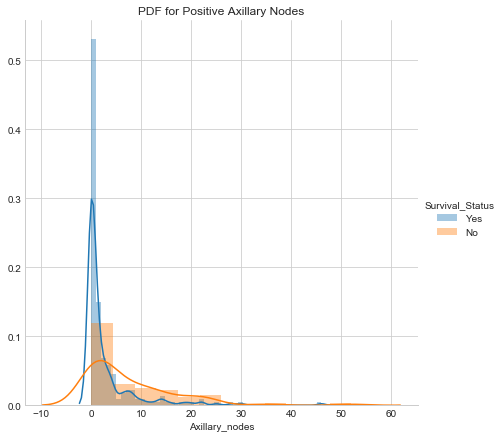

In [125]:
# PDF for Axillary_nodes
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue="Survival_Status", size=6) \
    .map(sns.distplot, "Axillary_nodes") \
    .add_legend()
plt.title("PDF for Positive Axillary Nodes")
plt.show()

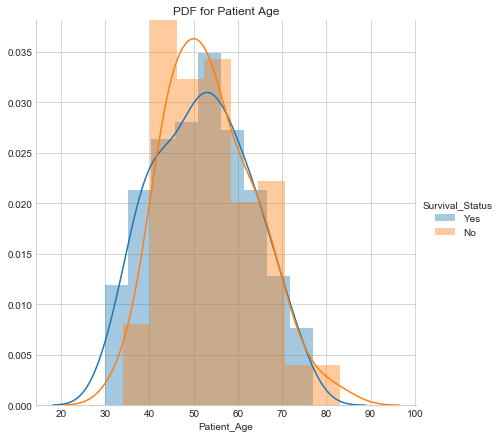

In [126]:
# PDF for Patient_Age
sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue="Survival_Status", size=6) \
    .map(sns.distplot, "Patient_Age") \
    .add_legend()
plt.title("PDF for Patient Age")
plt.show()

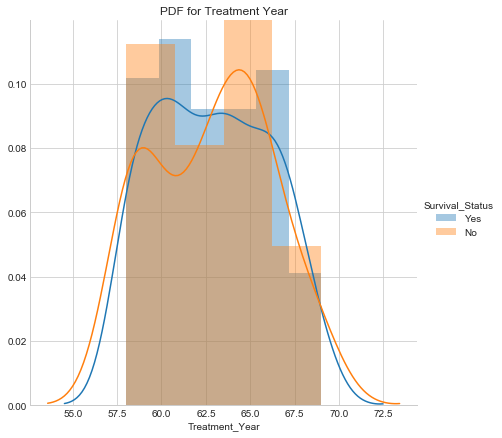

In [127]:
# PDF for Treatment_Year
sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue="Survival_Status", size=6) \
    .map(sns.distplot, "Treatment_Year") \
    .add_legend()
plt.title("PDF for Treatment Year")
plt.show()

# Observation:
* In all the plots the features are overlapping each other

# CDF(Cummulative Distributed Function)

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


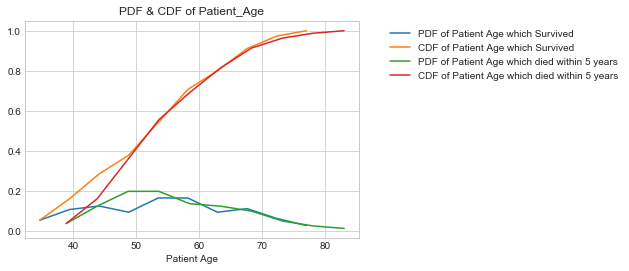

In [128]:
# CDF for Patient_Age
survived = cancer[cancer["Survival_Status"] == "Yes"]
died = cancer[cancer["Survival_Status"] == "No"]

counts, bin_edges = np.histogram(survived["Patient_Age"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF of Patient Age which Survived")
plt.plot(bin_edges[1:], cdf, label = "CDF of Patient Age which Survived")

counts, bin_edges = np.histogram(died["Patient_Age"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF of Patient Age which died within 5 years")
plt.plot(bin_edges[1:], cdf, label = "CDF of Patient Age which died within 5 years")

plt.legend(loc="best", bbox_to_anchor=(1.8,1.0))
plt.xlabel("Patient Age")
plt.title("PDF & CDF of Patient_Age")
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


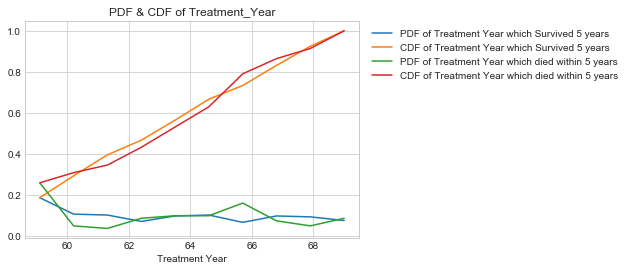

In [129]:
# CDF for Treatment_Year
survived = cancer[cancer["Survival_Status"] == "Yes"]
died = cancer[cancer["Survival_Status"] == "No"]

counts, bin_edges = np.histogram(survived["Treatment_Year"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF of Treatment Year which Survived 5 years")
plt.plot(bin_edges[1:], cdf, label = "CDF of Treatment Year which Survived 5 years")

counts, bin_edges = np.histogram(died["Treatment_Year"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF of Treatment Year which died within 5 years")
plt.plot(bin_edges[1:], cdf, label = "CDF of Treatment Year which died within 5 years")
plt.legend(loc="best", bbox_to_anchor=(1.8,1.0))

plt.legend(loc="best", bbox_to_anchor=(1.8,1.0))
plt.xlabel("Treatment Year")
plt.title("PDF & CDF of Treatment_Year")
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


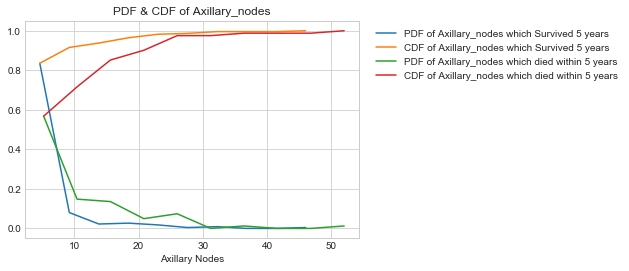

In [130]:
# CDF for Axillary_nodes
survived = cancer[cancer["Survival_Status"] == "Yes"]
died = cancer[cancer["Survival_Status"] == "No"]

counts, bin_edges = np.histogram(survived["Axillary_nodes"], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF of Axillary_nodes which Survived 5 years")
plt.plot(bin_edges[1:], cdf, label = "CDF of Axillary_nodes which Survived 5 years")

counts, bin_edges = np.histogram(died["Axillary_nodes"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF of Axillary_nodes which died within 5 years")
plt.plot(bin_edges[1:], cdf, label = "CDF of Axillary_nodes which died within 5 years")

plt.legend(loc="best", bbox_to_anchor=(1.8,1.0))
plt.xlabel("Axillary Nodes")
plt.title("PDF & CDF of Axillary_nodes")
plt.show()

# Observation:
* Almost 80% of the patients which had less than 5 axillary nodes were survived more than 5 years

# Box-plot and Whiskers

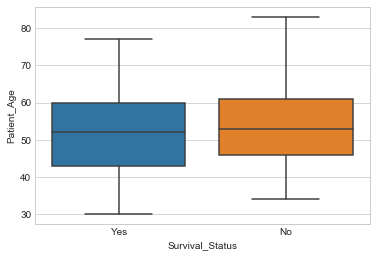

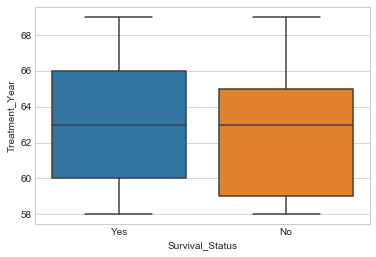

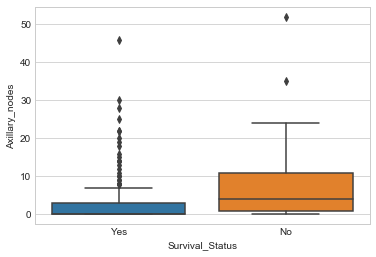

In [131]:
sns.boxplot(x="Survival_Status", y="Patient_Age", data = cancer)
plt.show()
sns.boxplot(x="Survival_Status", y="Treatment_Year", data = cancer)
plt.show()
sns.boxplot(x="Survival_Status", y="Axillary_nodes", data = cancer)
plt.show()

# Observations
* Auxillary nodes is highly densed between 0 and 5

# Bivariate Analysis

# Scatter Plot

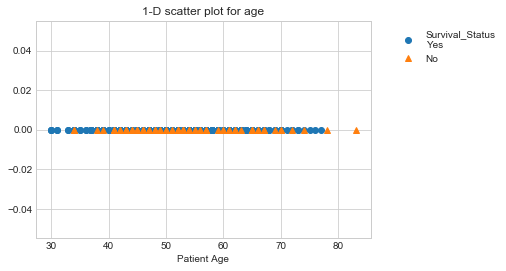

In [132]:
# 1-d scatter plot
one = cancer[cancer["Survival_Status"] == "Yes"]
two = cancer[cancer["Survival_Status"] == "No"]

plt.plot(one["Patient_Age"], np.zeros_like(one["Patient_Age"]),'o', label ="Survival_Status\nYes")
plt.plot(two["Patient_Age"], np.zeros_like(two["Patient_Age"]),'^', label ="No")
plt.legend(loc="best", bbox_to_anchor=(1.4,1.0))
plt.xlabel("Patient Age")
plt.title("1-D scatter plot for age")
plt.show()

# Observation :
* Many patients died whose age was between 40-70

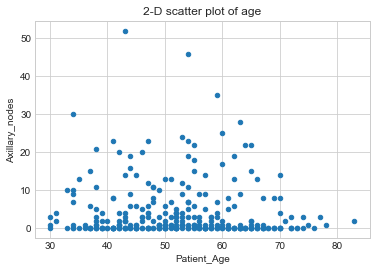

In [133]:
# 2-D Scatter Plot
cancer.plot(kind="scatter", x="Patient_Age", y = "Axillary_nodes")
plt.title("2-D scatter plot of age")
plt.show()

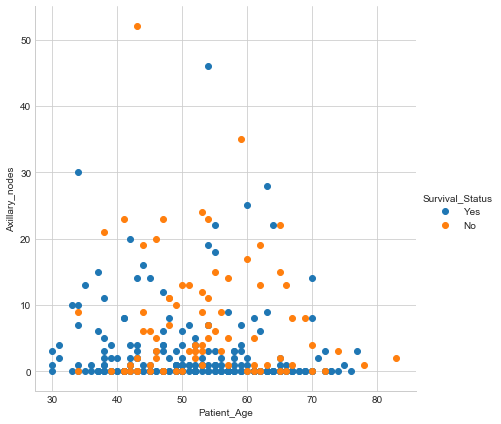

In [134]:
# 2-D scatter plot with color coding
sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue="Survival_Status", size=6) \
   .map(plt.scatter, "Patient_Age", "Axillary_nodes") \
   .add_legend()
plt.show()

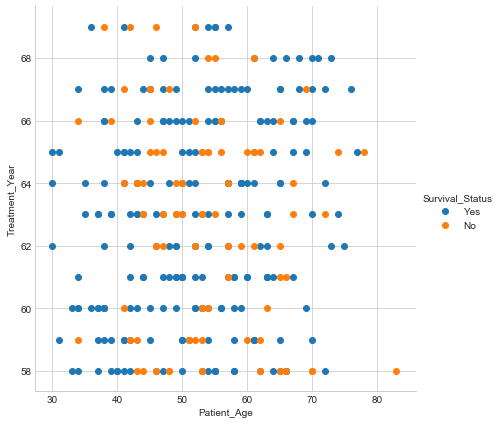

In [135]:
# 2-D scatter plot with color coding
sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue="Survival_Status", size=6) \
   .map(plt.scatter, "Patient_Age", "Treatment_Year") \
   .add_legend()
plt.show()

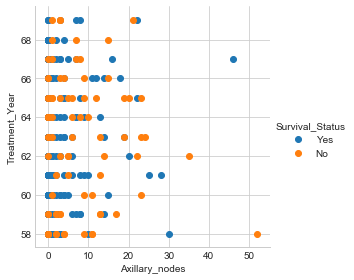

In [136]:
# 2-D scatter plot with color coding
sns.set_style("whitegrid")
sns.FacetGrid(cancer, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Axillary_nodes", "Treatment_Year") \
   .add_legend()
plt.show()

# Observation
* In the above 2d scatter plot a person died or survived is not linearly seperable

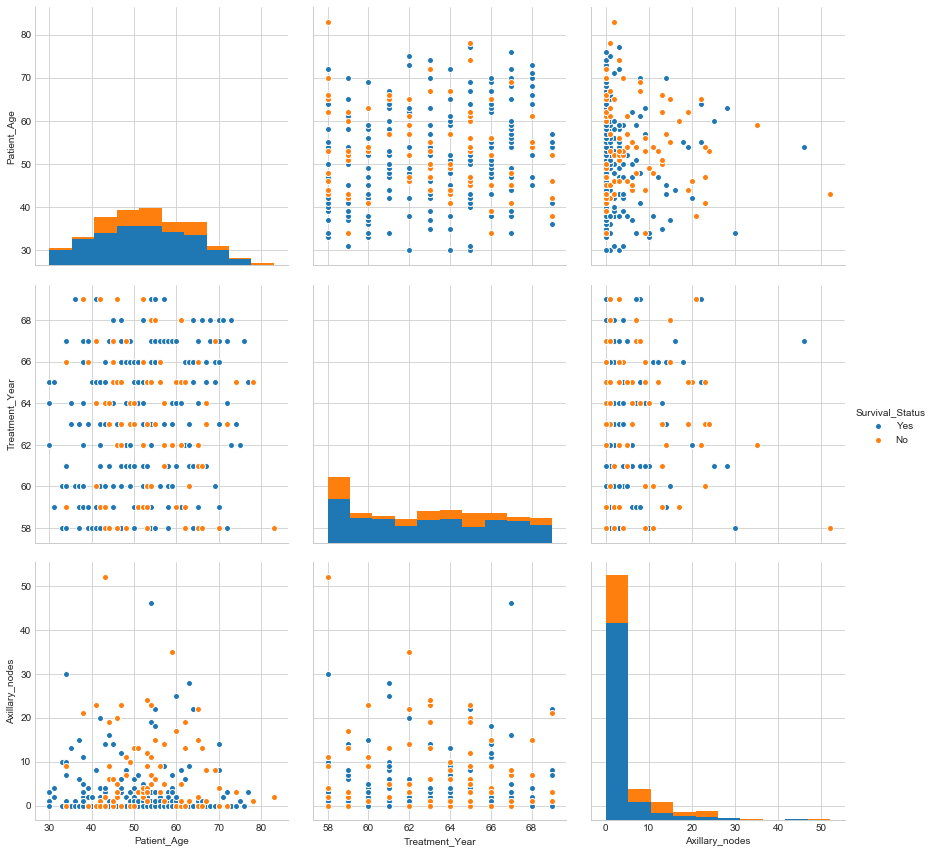

In [137]:
# Pair plot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(cancer, hue="Survival_Status", size=4)
plt.show()

# Observation
* Unable to classify which is the most useful feature because of too much overlapping

# Conclusion

* Given dataset is imbalanced as it does not contains equal number of data-points for each class.
* Given dataset is not linearly seperable from each class. 
* There is too much overlapping in the data-points and hence it is very diffucult to classify.